In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import scipy
import seaborn as sns
import pandas as pd

from scipy import stats
from math import sqrt
from scipy.stats import norm
from scipy.integrate import trapz
from scipy import random, linalg
from random import randrange, uniform
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from IPython.display import Image

%matplotlib inline

1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


<function matplotlib.pyplot.show(close=None, block=None)>

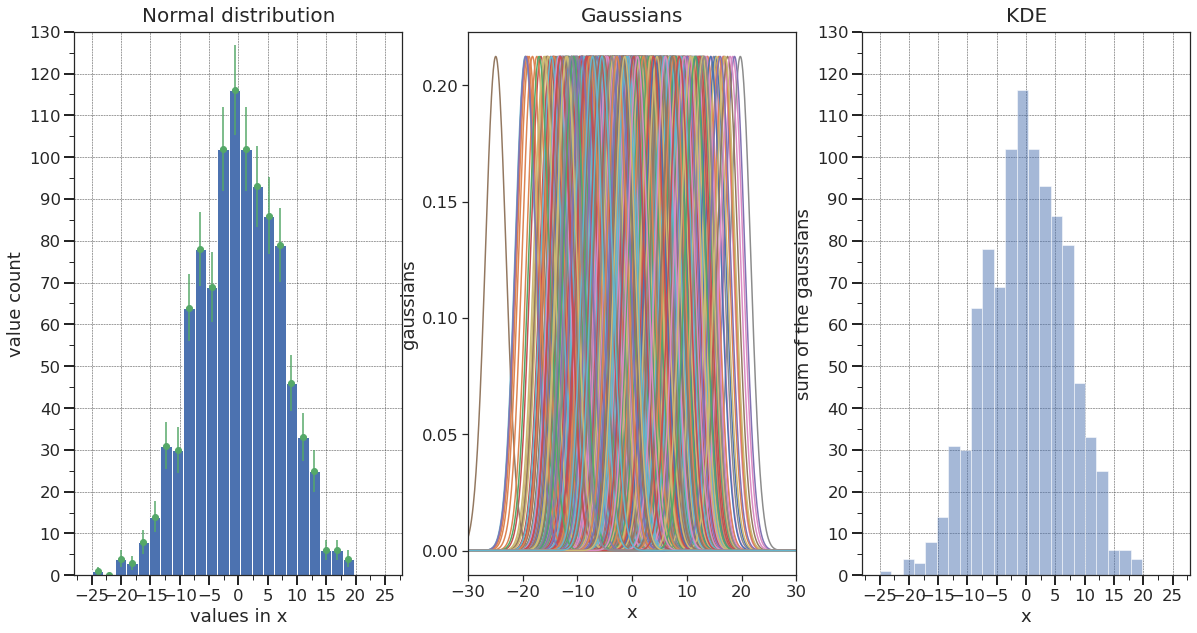

In [19]:

N=100
sigma=7
x=np.random.normal(loc=0.0, scale=sigma, size=10*N)
fig = plt.figure(figsize=(20,10))
gauss1 = fig.add_subplot(1, 3, 1)
gauss1.xaxis.set_major_locator(MultipleLocator(5))
gauss1.xaxis.set_minor_locator(AutoMinorLocator(2))
gauss1.yaxis.set_major_locator(MultipleLocator(10))
gauss1.yaxis.set_minor_locator(AutoMinorLocator(2))
gauss1.set_xlim(-4*sigma, 4*sigma)
gauss1.set_ylim(0, 130)
gauss1.tick_params(which='major', width=2.0)
gauss1.tick_params(which='major', length=10)
gauss1.tick_params(which='minor', width=1.0, labelsize=3)
gauss1.tick_params(which='minor', length=5, labelsize=3, labelcolor='0.25')
gauss1.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
counts, bins, bars=gauss1.hist(x, bins="auto")
gauss1.set_title("Normal distribution",fontsize=20, verticalalignment='bottom')
gauss1.set_xlabel("values in x")
gauss1.set_ylabel("value count")
gauss1.errorbar(x=0.5 * (bins[:-1] + bins[1:]), y=counts, yerr=np.sqrt(counts), marker='o', c='g', linestyle='None')
cbins = np.histogram_bin_edges(x, bins="auto")

std = 1.06*x.std()*(x.size)**-0.2
c = np.linspace(-20+int(x.min()),20+int(x.max()),len(x))
gauss2 = fig.add_subplot(1, 3, 2)
gaussians = np.array([stats.norm(loc=i,scale=std).pdf(c) for i in x])
for j in range(len(gaussians[:,1])): 
     gauss2.plot(c,gaussians[j,:])
gauss2.set_title('Gaussians',fontsize=20, verticalalignment='bottom')
gauss2.set_xlabel('x')
gauss2.set_ylabel('gaussians')
gauss2.set_xlim(-30, 30)


gauss3 = fig.add_subplot(1, 3, 3)
gauss_sum = np.sum(gaussians, axis = 0)
gauss_sum= (gauss_sum*N*10)/scipy.integrate.trapz(gauss_sum, c)
#gauss3.plot(c, gauss_sum)
gauss3.set_title("KDE",fontsize=20, verticalalignment='bottom')
gauss3.set_xlabel('x')
gauss3.set_ylabel('sum of the gaussians')
gauss3.hist(x, bins = cbins, label = 'x', alpha=0.5)
gauss3.xaxis.set_major_locator(MultipleLocator(5))
gauss3.xaxis.set_minor_locator(AutoMinorLocator(2))
gauss3.yaxis.set_major_locator(MultipleLocator(10))
gauss3.yaxis.set_minor_locator(AutoMinorLocator(2))
gauss3.set_xlim(-4*sigma, 4*sigma)
gauss3.set_ylim(0, 130)
gauss3.tick_params(which='major', width=2.0)
gauss3.tick_params(which='major', length=10)
gauss3.tick_params(which='minor', width=1.0, labelsize=3)
gauss3.tick_params(which='minor', length=5, labelsize=3, labelcolor='0.25')
gauss3.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

plt.show

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2021-11-30 21:56:12--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.67.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.67.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2021-11-30 21:56:12--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce6689a4c295653a7d6bd38d53b.dl.dropboxusercontent.com/cd/0/inline/Ba9amUewvwFrvx7lUcBvJw8FvxCdg8HEnreLDhobEnAMdfzB7gUSXwv2OfjP2h966N4NAQNOSDcLg9pCM-jgx5vzjaTjGXYtjrUESHB1rZEt3QoPw_yjbizYe0bK7dK4bhtiW-ngGaf9BQntkmRbUdd9/file# [following]
--2021-11-30 21:56:13--  https://uce6689a4c295653a7d6bd38d53b.dl.dropboxusercontent.com/cd/0/inline/Ba9amUewvwFrvx7lUcBvJw8FvxCdg8

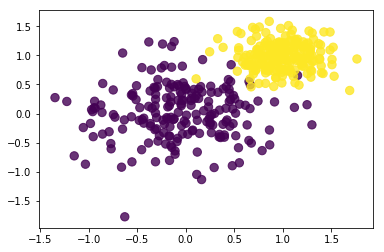

In [2]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png

Image('two_categories_scatter_plot.png')

<function matplotlib.pyplot.show(close=None, block=None)>

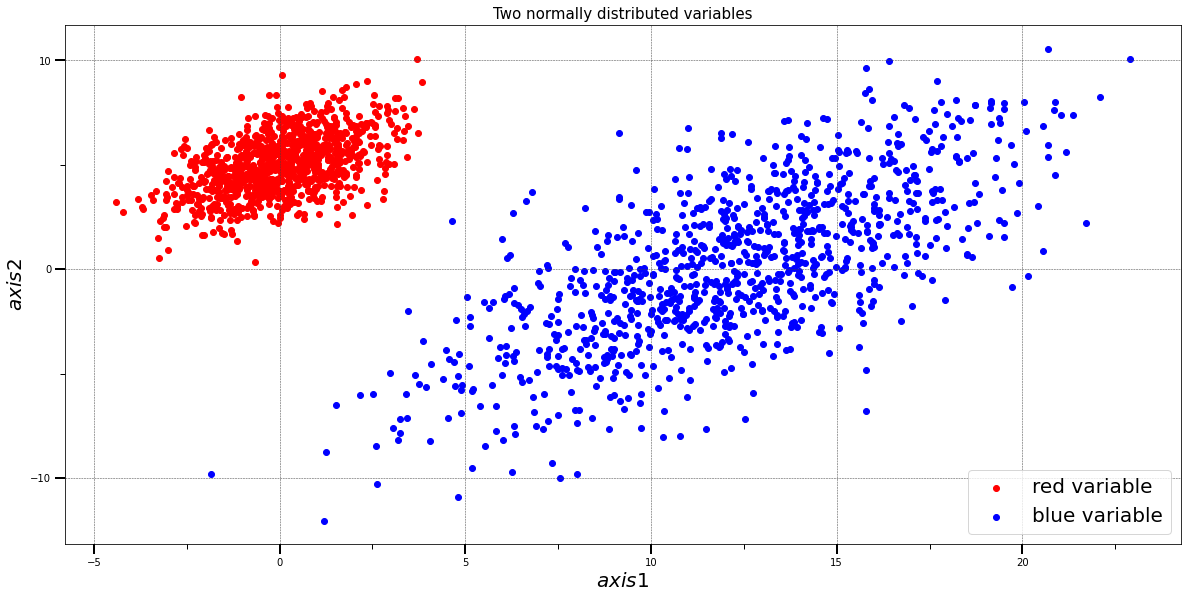

In [22]:
def datagen (means,covs,sizes,ndistr):
    distributions=[]
    for i in range (ndistr):
        distributions.append(np.random.multivariate_normal(mean=means[i,:], cov=covs[i], size=sizes[i]))
    return (distributions)

means=np.array([[0,5],[12,0]])
covs=[np.array([[2,1],[1,2]]),np.array([[15,10],[10,14]])]
sizes=[(1000),(1000)]
"""
mean1-D array_like, of length N
    Mean of the N-dimensional distribution.
cov2-D array_like, of shape (N, N)
    Covariance matrix of the distribution. It must be symmetric and positive-semidefinite for proper sampling.
sizeint or tuple of ints, optional
    Given a shape of, for example, (m,n,k), m*n*k samples are generated, and packed in an m-by-n-by-k arrangement. Because each sample is N-dimensional, the output shape is (m,n,k,N). If no shape is specified, a single (N-D) sample is returned.
"""
X,Y=datagen(means,covs,sizes,2)

fig = plt.figure(1,figsize=(20,30))
scat = fig.add_subplot(1, 1, 1, aspect=9/16)
scat.xaxis.set_major_locator(MultipleLocator(5))
scat.xaxis.set_minor_locator(AutoMinorLocator(2))
scat.yaxis.set_major_locator(MultipleLocator(10))
scat.yaxis.set_minor_locator(AutoMinorLocator(2))
scat.tick_params(which='major', width=2.0)
scat.tick_params(which='major', length=10)
scat.tick_params(which='minor', width=1.0, labelsize=3)
scat.tick_params(which='minor', length=5, labelsize=3, labelcolor='0.25')
scat.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)


scat.set_xlabel('$axis 1$',fontsize=20)
scat.set_ylabel('$axis 2$',fontsize=20)
scat.set_title('Two normally distributed variables',fontsize=15)

scat.scatter(x=X[:,0], y=X[:,1], c='red', label='red variable')
scat.scatter(x=Y[:,0], y=Y[:,1], c='blue', label='blue variable')

plt.legend(prop={'size': 20})

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

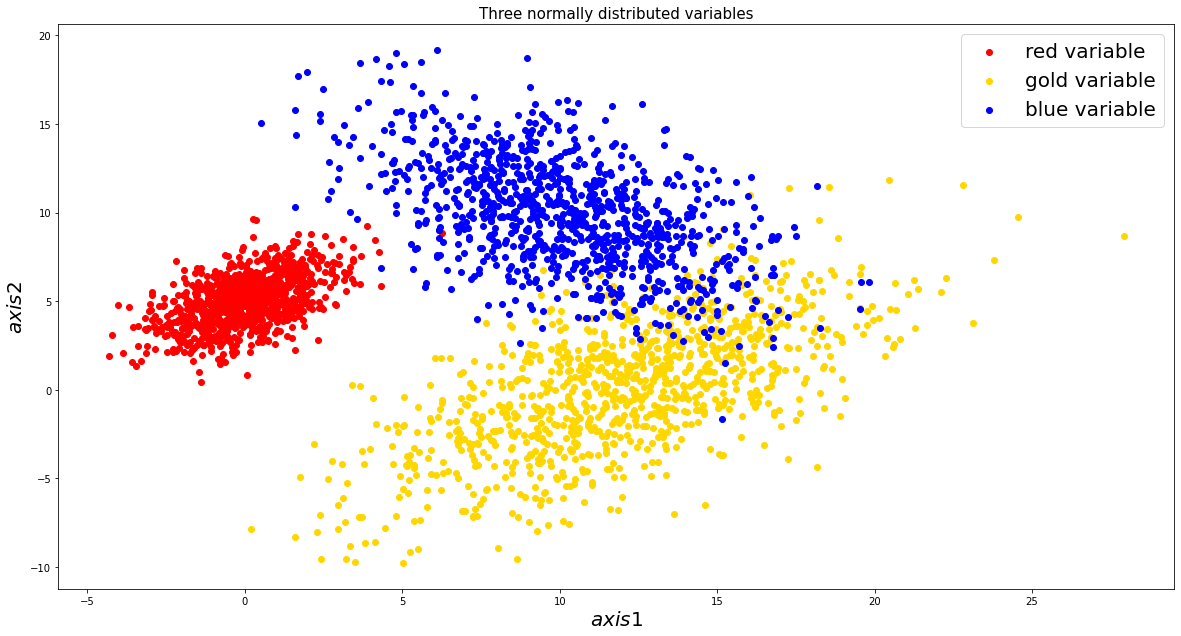

In [21]:
means=np.array([[0,5],[12,0],[10,10]])
covs=[np.array([[2,1],[1,2]]),np.array([[15,10],[10,14]]),np.array([[10,-5],[-5,10]])]
sizes=[(1000),(1000),(1000)]
X,Y,Z=datagen(means,covs,sizes,3)
fig = plt.figure(1,figsize=(20,30))
scat = fig.add_subplot(1, 1, 1, aspect=9/16)
scat.scatter(x=X[:,0], y=X[:,1], c='red', label='red variable')
scat.scatter(x=Y[:,0], y=Y[:,1], c='gold', label='gold variable')
scat.scatter(x=Z[:,0], y=Z[:,1], c='blue', label='blue variable')
plt.legend(prop={'size': 20})
scat.set_title('Three normally distributed variables',fontsize=15)
scat.set_xlabel('$axis 1$',fontsize=20)
scat.set_ylabel('$axis 2$',fontsize=20)
plt.show

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [3]:
! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2021-12-13 22:45:37--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6025:18::a27d:4512, 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6025:18::a27d:4512|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2021-12-13 22:45:38--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca457927f2e850843af1c2a8a11.dl.dropboxusercontent.com/cd/0/inline/Bbw9EPVHbcpubE-3IC8zCM357Ccoq1LeLkQuteZfao8T_CsBbL2-JeMZDMxnsdUV_FIyh07z5P2f2XPNv3unSPO18JsIdguIzxGuD_2RMYYlGdcgLqHQfFQk57ImhTv5zXnBIvmBb455qpi7tiL5aEMc/file# [following]
--2021-12-13 22:45:38--  https://uca457927f2e850843af1c2a8a11.dl.dropboxusercontent.com/cd/0/inline/Bbw9EPVHbcpubE-3IC8zCM357Ccoq1LeLkQuteZfao8T_CsBbL2-JeMZ

In [52]:
file_name="/home/lorenzo/Programming/CompLab/LaboratoryOfComputationalPhysics_Y4/residuals_261.npy"
data=np.load(file_name,allow_pickle=True)
df = pd.DataFrame(data.item())
df = df[abs(df['residuals']) < 2]
slope, intercept, r, p, err = stats.linregress(df['distances'],df['residuals'])
print(slope, intercept)


0.0032597701220305835 -0.15432816763069473


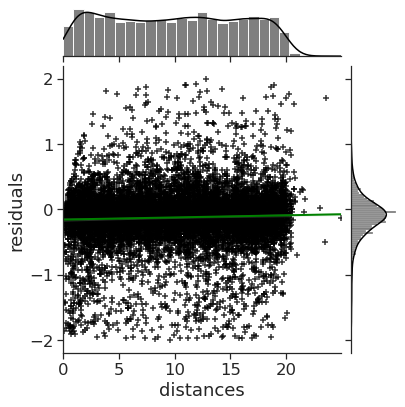

In [53]:
sns.jointplot(data=df, x="distances", y="residuals", kind="reg", marker='+', color='black', line_kws={"color": "green","linewidth":2,"label":'sns reg'})


In [60]:
bins = np.histogram_bin_edges(df.distances, bins="auto", range = (0,20))
x=np.zeros(len(bins)-1)
y=np.zeros(len(bins)-1)
erry=np.zeros(len(bins)-1)
for i in range(len(x)):
    dfi = df[(df['distances'] > bins[i]) & (df['distances'] < bins[i+1])]
    x[i] = np.mean([bins[i],bins[i+1]])
    y[i] = np.mean(dfi['residuals'])
    erry[i] = np.std(dfi['residuals'])
pl = np.array([df.distances.min(),df.distances.max()])

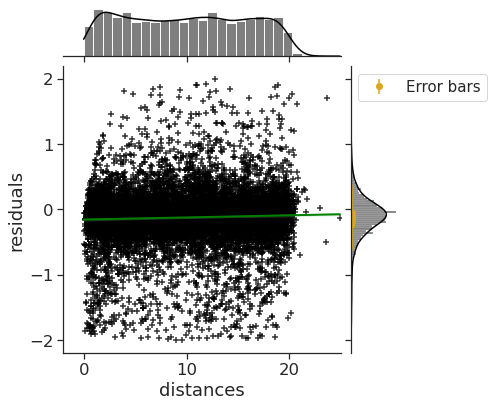

In [63]:
sns.set(style = 'ticks', font_scale = 1.5)
sns.jointplot(x = 'distances', y = 'residuals', data = df, kind = "reg", marker='+', xlim = [-2,25], color='black', line_kws = {"color" : "green", "label" : "sns reg", "lw" : 2})
plt.errorbar(x, y, erry, label = "Error bars", fmt = 'o', c = "goldenrod")
slope, intercept, r_value, p_value, std_err = stats.linregress(df.distances, df.residuals)
plt.plot(df.distances, intercept + slope*df.distances, 'y', linewidth = 2, label = "linregress")
plt.legend(loc = "best", fontsize = 15)


